# Exercise 1 : Understanding Data Visualization
Explain why data visualization is important in data analysis.

Data visualization is important in data analysis because it provides a clear and intuitive way to explore, understand, and communicate complex data. It translates large datasets into graphical representations, making it easier to identify patterns, trends, and insights that may not be immediately evident in raw data.
Visual formats like charts, graphs, and maps allow stakeholders to quickly grasp relationships, distributions, and outliers within the data. Visualization often uncovers trends, anomalies, or correlations that might be missed in traditional data analysis. Interactive and visually appealing representations can hold attention and encourage deeper exploration of the data.

Describe the purpose of a line graph in data visualization.

A line graph is used in data visualization to illustrate trends, relationships, or changes over a continuous range, such as time. It is especially effective for showing how one variable changes in relation to another, helping to identify patterns or trends.

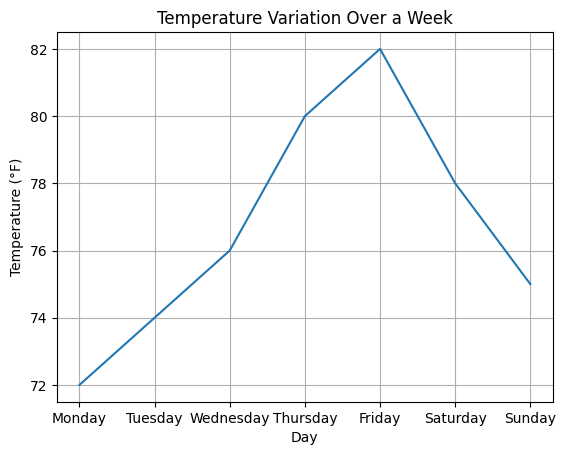

In [1]:
# Exercise 2 : Creating a Line Plot for Temperature Variation
import matplotlib.pyplot as plt
# Create a simple line plot using Matplotlib that represents the temperature variations over a week.
temperature = [72, 74, 76, 80, 82, 78, 75]
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.plot(days, temperature)
plt.xlabel('Day')
plt.ylabel('Temperature (°F)')
plt.title('Temperature Variation Over a Week')
plt.grid(True)
plt.show()


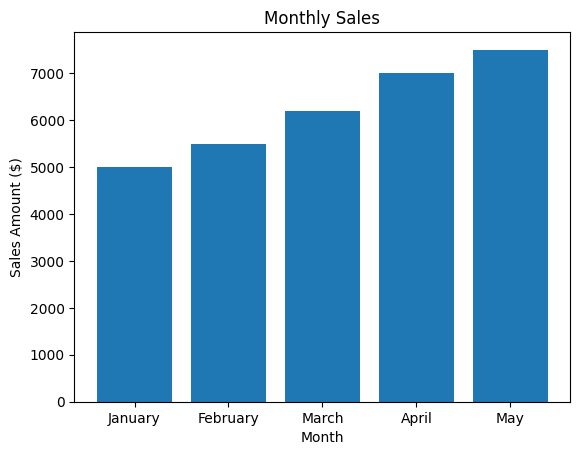

In [2]:
# Exercise 3 : Visualizing Monthly Sales with a Bar Chart
# Generate a bar chart using Matplotlib to visualize the monthly sales data for a retail store.
import matplotlib.pyplot as plt

sales = [5000, 5500, 6200, 7000, 7500]
months = ['January', 'February', 'March', 'April', 'May']

plt.bar(months, sales)
plt.xlabel('Month')
plt.ylabel('Sales Amount ($)')
plt.title('Monthly Sales')
plt.show()


In [5]:
# Exercise 4 : Data Visualisation
import pandas as pd

sales = pd.read_csv('sales_data.csv')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [8]:
sales['price'] = sales['price'].fillna(sales['price'].mean())
sales['quantity'] = sales['quantity'].fillna(sales['quantity'].mean())
sales['revenue'] = sales['revenue'].fillna(sales['revenue'].mean())
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     369 non-null    float64
 4   quantity  369 non-null    float64
 5   revenue   369 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [9]:
sales.head(10)

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
5,2022-01-05,Watch,Accessories,150.0,10.0,1500.0
6,2022-01-06,Smartphone,Electronics,600.0,8.0,4800.0
7,2022-01-06,Tablet,Electronics,400.0,5.0,2000.0
8,2022-01-07,Coat,Clothing,100.0,10.0,1000.0
9,2022-01-08,Smartwatch,Accessories,200.0,12.0,2400.0


In [18]:
sales.duplicated().sum()
sales.drop_duplicates(inplace=True)

In [19]:
sales['quantity'] = sales['quantity'].astype(int)
sales['price'] = sales['price'].astype(int)
sales['revenue'] = sales['revenue'].astype(int)

In [20]:
total_quantity = sales['quantity'].sum()
print(f"Total Quantity: {total_quantity}")

Total Quantity: 5344


In [22]:
category_revenue = sales.groupby('category')['revenue'].sum()
best_category = category_revenue.idxmax()
highest_revenue = category_revenue.max()
print(f"Best Category: {best_category}")
print(f"Highest Revenue: {highest_revenue}")

Best Category: Electronics
Highest Revenue: 516080


In [28]:
avg_revenue = sales.groupby('product')['revenue'].mean().astype(int)
avg_sorted = avg_revenue.sort_values(ascending=False)
print(avg_sorted)

product
Laptop        6000
Smartphone    5297
Tablet        2000
Smartwatch    1690
Speaker       1587
Watch         1486
Headphones    1384
Wallet        1100
Coat           965
Sneakers       900
Hoodie         860
Jeans          860
Backpack       850
T-Shirt        528
Name: revenue, dtype: int64


In [29]:
import pandas as pd
sales['date'] = pd.to_datetime(sales['date'])
sales['quarter'] = sales['date'].dt.quarter
quarter_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
sales['quarter'] = sales['quarter'].map(quarter_labels)
sales_sorted_Q = sales.sort_values(by='quarter')
print(sales_sorted_Q)


          date     product     category  price  quantity  revenue quarter
0   2022-01-01  Smartphone  Electronics    600        10     6000      Q1
66  2022-03-06  Smartphone  Electronics    600         7     4200      Q1
65  2022-03-05  Smartwatch  Accessories    200        12     2400      Q1
64  2022-03-04        Coat     Clothing    100        20     2000      Q1
63  2022-03-03  Headphones  Electronics    100        15     1500      Q1
..         ...         ...          ...    ...       ...      ...     ...
302 2022-10-27  Smartphone  Electronics    600         9     5400      Q4
301 2022-10-26       Jeans     Clothing     50        15      750      Q4
300 2022-10-25  Smartwatch  Accessories    200         8     1600      Q4
309 2022-11-03     Speaker  Electronics     80        22     1760      Q4
368 2022-12-31      Hoodie     Clothing     40        30     1200      Q4

[368 rows x 7 columns]


In [39]:
quarter_revenue = sales.groupby('quarter')['revenue'].sum()
print(quarter_revenue)

quarter
Q1    182100
Q2    186030
Q3    197680
Q4    193380
Name: revenue, dtype: int64


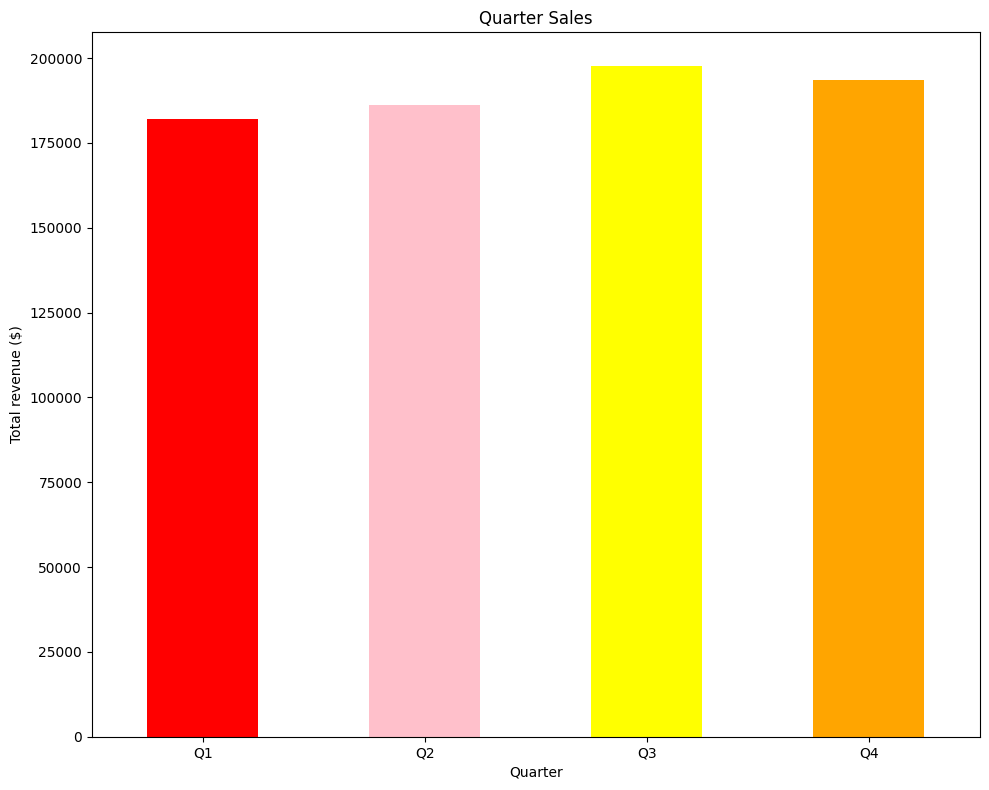

In [45]:
import matplotlib.pyplot as plt
quarter_revenue = sales.groupby('quarter')['revenue'].sum()


plt.figure(figsize=(10, 8))
quarter_revenue.plot(kind='bar', color=['red', 'pink', 'yellow', 'orange'])
plt.xticks(ticks=range(len(quarter_revenue.index)), labels=[f'{i}' for i in quarter_revenue.index], rotation=0)
plt.xlabel('Quarter')
plt.ylabel('Total revenue ($)')
plt.title('Quarter Sales')
plt.tight_layout()
plt.show()

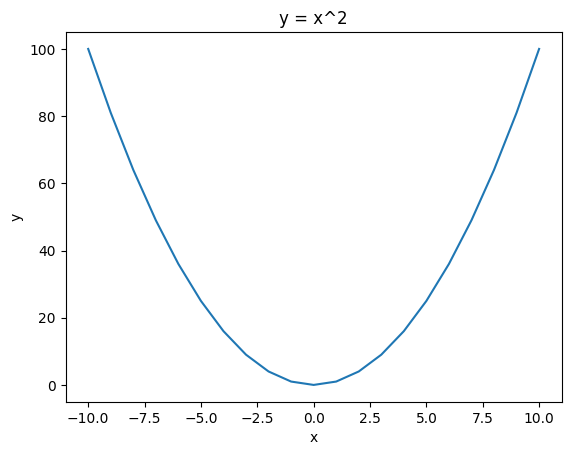

In [46]:
# Exercise 5 : Data Visualisation Using MatPlotLib

import matplotlib.pyplot as plt
x = range(-10, 11)
y = [i**2 for i in x]
plt.plot(x, y)
plt.title("y = x^2")
plt.xlabel("x")
plt.ylabel("y")
plt.show()



Text(0, 0.5, 'Sales')

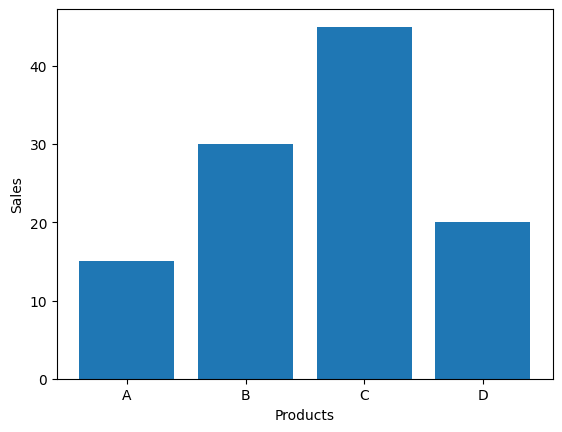

In [50]:
# Generate a bar chart to display the sales data of four different products (A, B, C, D) in a week. The sales values are 15, 30, 45, and 20 respectively. Label the chart appropriately.
import matplotlib.pyplot as plt
products = ['A', 'B', 'C', 'D']
sales = [15, 30, 45, 20]

plt.bar(products, sales)
plt.xlabel('Products')
plt.ylabel('Sales')

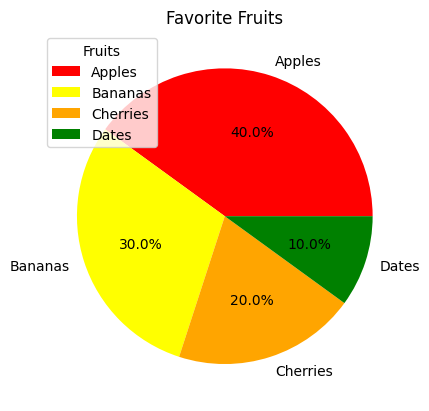

In [55]:
# Create a pie chart representing the following data about favorite fruits of a group of people: Apples (40%), Bananas (30%), Cherries (20%), and Dates (10%). Customize the chart with different colors for each fruit and add a legend.
import matplotlib.pyplot as plt
fruits = ['Apples', 'Bananas', 'Cherries', 'Dates']
percentages = [40, 30, 20, 10]

plt.pie(percentages, labels=fruits, colors=['red', 'yellow', 'orange', 'green'], autopct='%1.1f%%')
plt.title('Favorite Fruits')
plt.legend(title='Fruits', loc='upper left')
plt.show()
